# [Binary Tree C++](https://github.com/binzi56/algorithm-pattern-c/blob/master/data_structure/binary_tree.md)

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## [104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/)

Easy

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

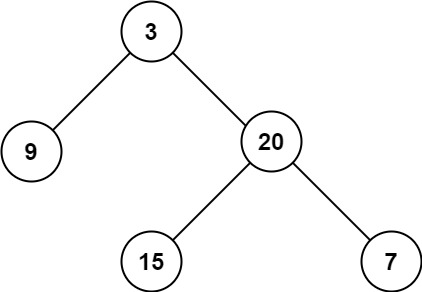

Example 1:

    Input: root = [3,9,20,null,null,15,7]
    Output: 3

Constraints:

    The number of nodes in the tree is in the range [0, 104].
    -100 <= Node.val <= 100


In [1]:
// Definition for a binary tree node.

struct TreeNode {
    int val;
    TreeNode *left;
    TreeNode *right;
    TreeNode() : val(0), left(nullptr), right(nullptr) {}
    TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
    TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
};

In [ ]:
// 4ms 參考解答用了 BFS！

#include <algorithm>  // std::max

int maxDepth(TreeNode* root) {
    if(root)
        return 1 + std::max(maxDepth(root->left), maxDepth(root->right));
    else
        return 0;
}

## [110. Balanced Binary Tree](https://leetcode.com/problems/balanced-binary-tree/)

Easy

Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

    a binary tree in which the left and right subtrees of every node differ in height by no more than 1.

Example 1:

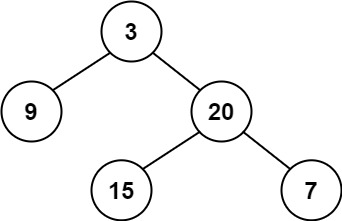

    Input: root = [3,9,20,null,null,15,7]
    Output: true
 
Constraints:

    The number of nodes in the tree is in the range [0, 5000].
    -10^4 <= Node.val <= 10^4



In [ ]:
// std::pair + structured binding (available since C++17)

#include <utility>    // std::pair
#include <algorithm>  // std::max
#include <cmath>      // std::abs

std::pair<int, bool> depth_balanced(const TreeNode* const root){
    if (root)
    {
        auto [depth_l, balanced_l] = depth_balanced(root->left);
        auto [depth_r, balanced_r] = depth_balanced(root->right);
        
        return {1 + std::max(depth_l, depth_r), balanced_l and balanced_r and std::abs(depth_l - depth_r) < 2};
    }
    else
    {
        return {0, true};
    }
}

In [3]:
bool isBalanced(TreeNode* root) {
    auto [depth, balanced] = depth_balanced(root);
    return balanced;
}

## [124. Binary Tree Maximum Path Sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)

Hard

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any path.

 
Example 2:

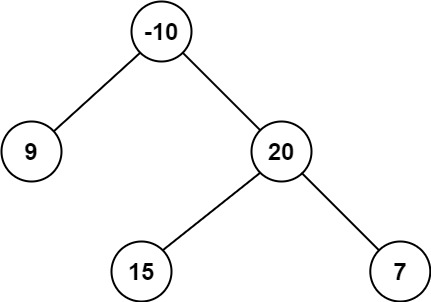

    Input: root = [-10,9,20,null,null,15,7]
    Output: 42
    Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

Constraints:

    The number of nodes in the tree is in the range [1, 3*10^4].
    -1000 <= Node.val <= 1000



In [ ]:
#include <utility>    // std::pair
#include <algorithm>  // std::max

std::pair<int, int> mps(const TreeNode* const root){
    if (root)
    {
        auto [sum_l, rsum_l] = mps(root->left);
        auto [sum_r, rsum_r] = mps(root->right);
        int rsum = std::max({root->val, root->val + rsum_l, root->val + rsum_r});

        return {std::max({sum_l, sum_r, rsum, root->val + rsum_l + rsum_r}), rsum};
    }
    else
    {
        return {-100000, -100000};
    }
}

In [ ]:
int maxPathSum(TreeNode* root) {
    auto [sum, rsum] = mps(root);
    return sum;        
}